In [218]:
import pandas as pd
import numpy as np

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
df = pd.read_csv('application_train.csv')

In [221]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


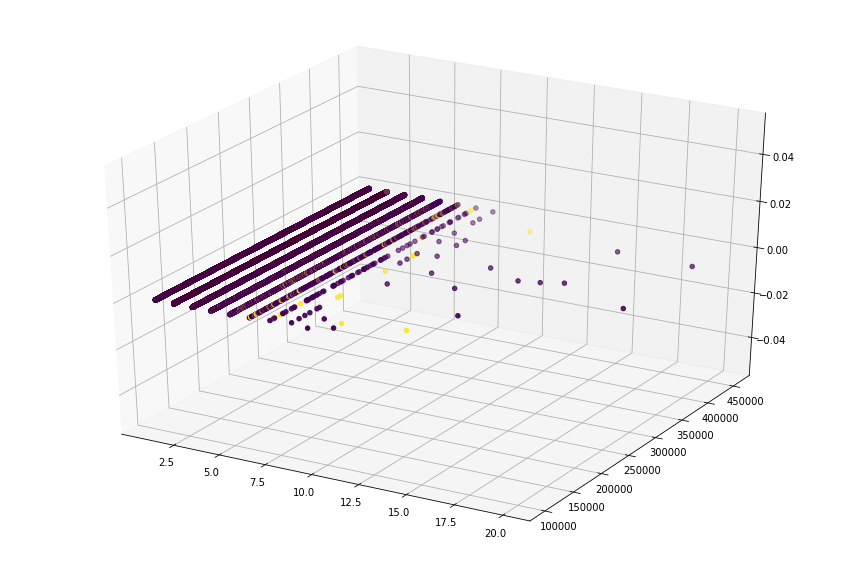

In [222]:
from mpl_toolkits.mplot3d import Axes3D
import  matplotlib.pyplot as plt 
import matplotlib as mpl
%matplotlib inline
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.scatter3D(df['CNT_FAM_MEMBERS'],df['SK_ID_CURR'],c = df['TARGET'] )
#sns.lmplot('CNT_FAM_MEMBERS','SK_ID_CURR',df,hue='TARGET')

In [223]:
len(df.columns)

122

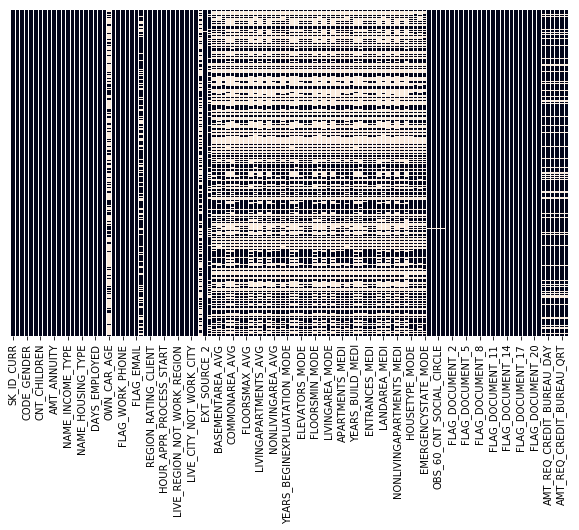

In [224]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [225]:
target  = df['TARGET']
df.dropna(axis=1,inplace = True)

In [226]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0,0,0,0,0,0,0,0,0,0


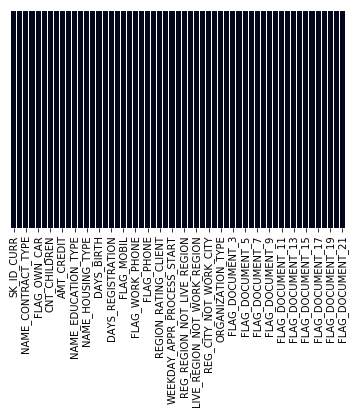

In [227]:
sns.heatmap(df.isna(),cbar=False,yticklabels=False)

In [228]:
gender = pd.get_dummies(df['CODE_GENDER'],drop_first=True)
gender.rename(columns={'M':'Male'},inplace=True)
gender.drop('XNA',axis=1,inplace=True)

In [229]:
flag_own_car = pd.get_dummies(df['FLAG_OWN_CAR'],drop_first=True)
flag_own_car.rename(columns={'Y' : 'flag_own_car'},inplace=True)

In [230]:
flag_own_reality = pd.get_dummies(df['FLAG_OWN_REALTY'],drop_first=True)
flag_own_reality.rename(columns={'Y' : 'flag_own_reality'},inplace=True)
flag_own_reality.head()

,flag_own_reality
0,1
1,0
2,1
3,1
4,1


In [231]:
df = pd.concat([df,gender,flag_own_car,flag_own_reality],axis=1)

In [232]:
len(df.columns)

58

In [233]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,Male,flag_own_car,flag_own_reality
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0,0,0,0,0,0,0,1,0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0,0,0,0,0,0,0,1,1,1
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0,0,0,0,0,0,0,0,0,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0,0,0,0,0,0,0,1,0,1


In [234]:
df.drop(['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY'],inplace=True,axis=1)

In [235]:
df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,Male,flag_own_car,flag_own_reality
0,100002,1,0,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,...,0,0,0,0,0,0,0,1,0,1
1,100003,0,0,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,0.003541,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,...,0,0,0,0,0,0,0,1,1,1
3,100006,0,0,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,...,0,0,0,0,0,0,0,0,0,1
4,100007,0,0,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,...,0,0,0,0,0,0,0,1,0,1


In [236]:
family_status = pd.get_dummies(df['NAME_FAMILY_STATUS'])
family_status.head()

,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,0,0,0,1,0,0


In [237]:
housing_type = pd.get_dummies(df['NAME_HOUSING_TYPE'])
housing_type.head()

,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [238]:
Income_type = pd.get_dummies(df['NAME_INCOME_TYPE'])
Income_type.head()

,Businessman,Commercial associate,Maternity leave,Pensioner,State servant,Student,Unemployed,Working
0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1


In [239]:
family_status = pd.get_dummies(df['NAME_FAMILY_STATUS'])
family_status.head()

,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,0,0,0,1,0,0


In [240]:
df.drop(['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'],axis=1,inplace=True)

In [241]:
df = pd.concat([df,housing_type,Income_type,family_status],axis=1)

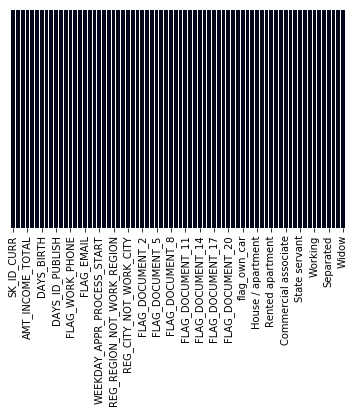

In [242]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 70 columns):
SK_ID_CURR                     307511 non-null int64
TARGET                         307511 non-null int64
CNT_CHILDREN                   307511 non-null int64
AMT_INCOME_TOTAL               307511 non-null float64
AMT_CREDIT                     307511 non-null float64
REGION_POPULATION_RELATIVE     307511 non-null float64
DAYS_BIRTH                     307511 non-null int64
DAYS_EMPLOYED                  307511 non-null int64
DAYS_REGISTRATION              307511 non-null float64
DAYS_ID_PUBLISH                307511 non-null int64
FLAG_MOBIL                     307511 non-null int64
FLAG_EMP_PHONE                 307511 non-null int64
FLAG_WORK_PHONE                307511 non-null int64
FLAG_CONT_MOBILE               307511 non-null int64
FLAG_PHONE                     307511 non-null int64
FLAG_EMAIL                     307511 non-null int64
REGION_RATING_CLIENT           30

In [244]:
target = target.apply(lambda x : float(x))

In [245]:
Weekday_Appr_Process_Strat = pd.get_dummies(df['WEEKDAY_APPR_PROCESS_START'])
df = pd.concat([df,Weekday_Appr_Process_Strat],axis=1)

In [246]:
df.drop(['ORGANIZATION_TYPE', 'WEEKDAY_APPR_PROCESS_START'],axis=1,inplace=True)

In [247]:
from sklearn.model_selection import train_test_split

In [106]:
x = df
y = target
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [248]:
from sklearn.linear_model import LogisticRegression

In [249]:
logit = LogisticRegression()

In [250]:
logit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [251]:
prediction = logit.predict(X_test)

In [252]:
from sklearn.metrics import classification_report,confusion_matrix

In [253]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

        0.0       0.92      1.00      0.96     84786
        1.0       0.00      0.00      0.00      7468

avg / total       0.84      0.92      0.88     92254



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [254]:
print(confusion_matrix(y_test,prediction))

[[84786     0]
 [ 7468     0]]


In [114]:
#from sklearn import metrics
#print(metrics.accuracy_score(y_test,prediction))

0.9190495805059943


In [115]:
#from sklearn.tree import DecisionTreeClassifier

In [116]:
#dst = DecisionTreeClassifier()

In [117]:
#dst.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [118]:
#pr = dst.predict(X_test)

In [119]:
#from sklearn.metrics import classification_report,confusion_matrix

In [120]:
#print(classification_report(y_test,pr))
#print(confusion_matrix(y_test,pr))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     84786
        1.0       1.00      1.00      1.00      7468

avg / total       1.00      1.00      1.00     92254

[[84786     0]
 [    0  7468]]


In [121]:
#from sklearn import metrics
#print(metrics.accuracy_score(y_test,pr))

1.0


In [255]:
x = df
y = target

In [256]:
dst.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [257]:
testing = pd.read_csv("application_test.csv")

In [258]:
testing.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [259]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20

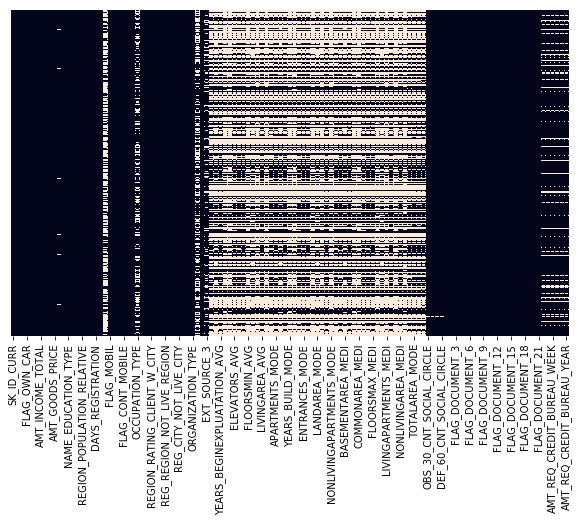

In [260]:
plt.figure(figsize=(10,6))
sns.heatmap(testing.isnull(),yticklabels=False,cbar=False)

In [261]:
testing.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
testing.dropna(axis=1,inplace = True)

In [263]:
len(testing.columns)

57

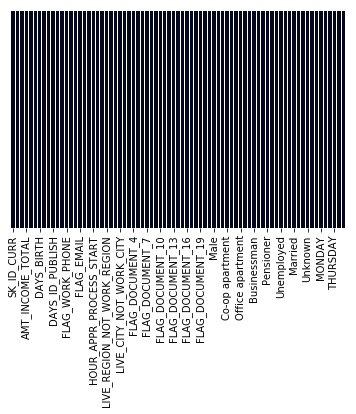

In [264]:
sns.heatmap(df.isna(),cbar=False,yticklabels=False)

In [265]:
gender = pd.get_dummies(testing['CODE_GENDER'],drop_first=True)
gender.rename(columns={'M':'Male'},inplace=True)

In [266]:
flag_own_car = pd.get_dummies(testing['FLAG_OWN_CAR'],drop_first=True)
flag_own_car.rename(columns={'Y' : 'flag_own_car'},inplace=True)

In [267]:
flag_own_reality = pd.get_dummies(testing['FLAG_OWN_REALTY'],drop_first=True)
flag_own_reality.rename(columns={'Y' : 'flag_own_reality'},inplace=True)
flag_own_reality.head()

,flag_own_reality
0,1
1,1
2,1
3,1
4,0


In [268]:
testing = pd.concat([testing,gender,flag_own_car,flag_own_reality],axis=1)

In [269]:
len(testing.columns)

60

In [270]:
testing.drop(['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY'],inplace=True,axis=1)

In [271]:
testing.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,...,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,Male,flag_own_car,flag_own_reality
0,100001,0,135000.0,568800.0,450000.0,Working,Higher education,Married,House / apartment,0.018850,...,0,0,0,0,0,0,0,0,0,1
1,100005,0,99000.0,222768.0,180000.0,Working,Secondary / secondary special,Married,House / apartment,0.035792,...,0,0,0,0,0,0,0,1,0,1
2,100013,0,202500.0,663264.0,630000.0,Working,Higher education,Married,House / apartment,0.019101,...,0,0,0,0,0,0,0,1,1,1
3,100028,2,315000.0,1575000.0,1575000.0,Working,Secondary / secondary special,Married,House / apartment,0.026392,...,0,0,0,0,0,0,0,0,0,1
4,100038,1,180000.0,625500.0,625500.0,Working,Secondary / secondary special,Married,House / apartment,0.010032,...,0,0,0,0,0,0,0,1,1,0


In [274]:
family_status = pd.get_dummies(testing['NAME_FAMILY_STATUS'])
family_status.head()

,Civil marriage,Married,Separated,Single / not married,Widow
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


In [275]:
housing_type = pd.get_dummies(testing['NAME_HOUSING_TYPE'])
housing_type.head()

,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [276]:
Income_type = pd.get_dummies(testing['NAME_INCOME_TYPE'])
Income_type.head()

,Businessman,Commercial associate,Pensioner,State servant,Student,Unemployed,Working
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [277]:
testing.drop(['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'],axis=1,inplace=True)

In [278]:
testing = pd.concat([testing,housing_type,Income_type,family_status],axis=1)

In [279]:
Weekday_Appr_Process_Strat = pd.get_dummies(testing['WEEKDAY_APPR_PROCESS_START'])
testing = pd.concat([testing,Weekday_Appr_Process_Strat],axis=1)

In [280]:
testing.drop(['ORGANIZATION_TYPE', 'WEEKDAY_APPR_PROCESS_START'],axis=1,inplace=True)

In [281]:
x_testing = testing

In [282]:
prediction = dst.predict(x_testing)

In [290]:
len(prediction)

48744

In [288]:
predict = pd.DataFrame({'SK_ID_CURR' : testing['SK_ID_CURR'],'TARGET' : prediction})

In [291]:
len(predict)

48744

In [294]:
predict.to_csv('Prediction.csv',index=False)

In [295]:
from sklearn.ensemble import RandomForestClassifier

In [296]:
rfc = RandomForestClassifier(n_estimators=200)

In [297]:
rfc.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [298]:
pred = rfc.predict(x_testing)

In [306]:
d = pd.DataFrame({'pred' : pred,'prediction' : prediction})

In [316]:
el = d[d['pred'] != d['prediction']]

In [317]:
el

,pred,prediction
